In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import warnings
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt


# Load the dataset
df = pd.read_csv(r"C:\Users\desai\Downloads\temperature_device_failure.csv")

### 1) Plot / Visualize the 'original' dataset (hint: this is a Time Series object)

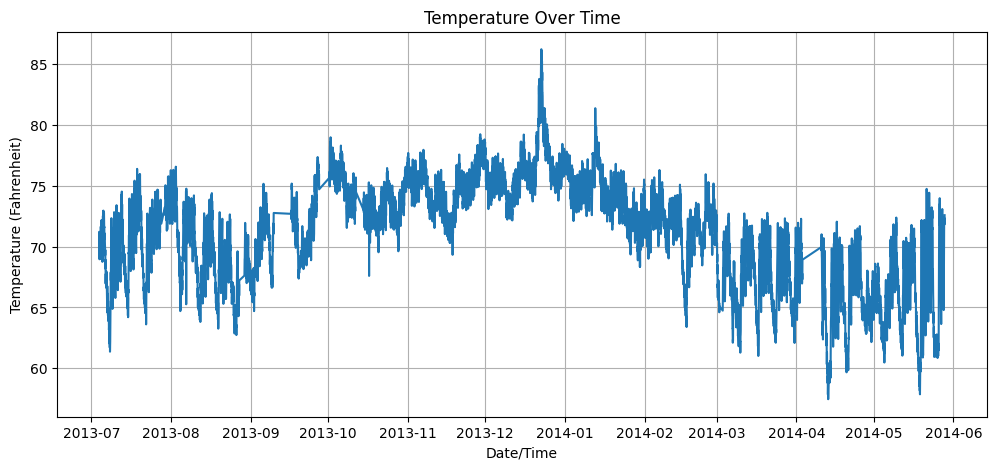

In [7]:


# Convert the 'timestamp' column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set the 'timestamp' column as the index
df.set_index('timestamp', inplace=True)

# Plot the original dataset
plt.figure(figsize=(12, 5))
plt.plot(df['value'])
plt.title('Temperature Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Temperature (Fahrenheit)')
plt.grid(True)
plt.show()

###### 2) Perform Feature Engineering on the dataset such that new features to be added.
Specifically, you need to create a feature that will indicate the day of the week and time
of the day. Namely, there should be four (4) categories (clusters?) for the feature, name it
'dtcat' (date-time-category):
- Weekday Day
- Weekday Night
- Weekend Day
- Weekend Night

In [8]:
# Convert the index to datetime format
df.index = pd.to_datetime(df.index)

# Define the duration of 'Day' and 'Night'
day_start = 7
day_end = 19
night_start = 19
night_end = 7

# Create a new column 'dtcat' based on the index (timestamp)
def get_dtcat(timestamp):
    dayofweek = timestamp.weekday()
    hours = timestamp.hour
    if dayofweek < 5:
        if hours >= day_start and hours <= day_end:
            return 'Weekday Day'
        elif hours > night_start or hours < night_end:
            return 'Weekday Night'
    else:
        if hours >= day_start and hours <= day_end:
            return 'Weekend Day'
        elif hours > night_start or hours < night_end:
            return 'Weekend Night'


df['dtcat'] = df.index.to_series().apply(get_dtcat)

df=df.reset_index()


# Preprocess the data
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['hour'] = df['timestamp'].dt.hour


# Print the modified DataFrame
print(df.head())

            timestamp      value          dtcat  dayofweek  hour
0 2013-07-04 00:00:00  69.880835  Weekday Night          3     0
1 2013-07-04 01:00:00  71.220227  Weekday Night          3     1
2 2013-07-04 02:00:00  70.877805  Weekday Night          3     2
3 2013-07-04 03:00:00  68.959400  Weekday Night          3     3
4 2013-07-04 04:00:00  69.283551  Weekday Night          3     4


In [9]:
# Perform one-hot encoding on the 'dtcat' column
onehot_encoder = OneHotEncoder(sparse=False)
dtcat_encoded = onehot_encoder.fit_transform(df[['dtcat']])

# Combine the encoded dtcat columns with dayofweek and hour
X = pd.concat([df[['dayofweek', 'hour']], pd.DataFrame(dtcat_encoded)], axis=1)

# Convert feature names to strings
X.columns = X.columns.astype(str)

# Initialize an empty list to store inertia scores
scores = []
X

C:\Users\desai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,dayofweek,hour,0,1,2,3
0,3,0,0.0,1.0,0.0,0.0
1,3,1,0.0,1.0,0.0,0.0
2,3,2,0.0,1.0,0.0,0.0
3,3,3,0.0,1.0,0.0,0.0
4,3,4,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
7262,2,11,1.0,0.0,0.0,0.0
7263,2,12,1.0,0.0,0.0,0.0
7264,2,13,1.0,0.0,0.0,0.0
7265,2,14,1.0,0.0,0.0,0.0


### 3) Apply the K-Means algorithm to the revised dataset and determine the best value for K.
I would suggest to test K in the range of [1, 20]. Plot a graph showing the number of
clusters (K) in relation to score of each K-Means model. (Look at slide #20 from lecture
for setting up the plot...)

Best value of K: 2


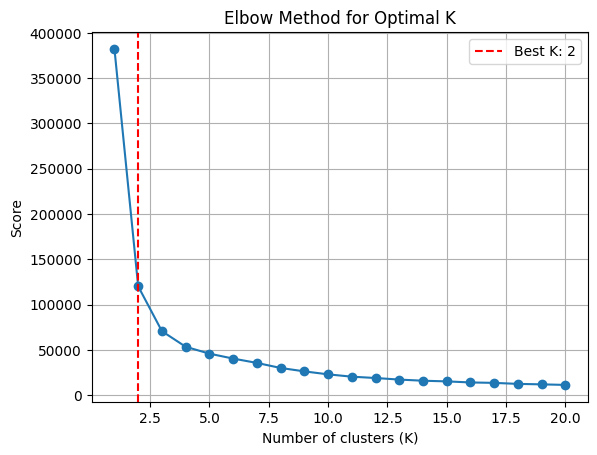

In [10]:
# Convert feature names to strings
X.columns = X.columns.astype(str)

# Initialize an empty list to store inertia scores
scores = []


# Iterate over different values of K
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    scores.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 21), scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Score')
plt.title('Elbow Method for Optimal K')
plt.grid(True)

# Find the best value of K (number of clusters)
import numpy as np

# Calculate the differences in consecutive inertia scores
diffs = np.diff(scores)

# Calculate the second differences
second_diffs = np.diff(diffs)

# Find the index corresponding to the "elbow" point
elbow_index = np.argmax(second_diffs) + 1

# Best value of K
best_k = elbow_index + 1

print("Best value of K:", best_k)

# Plot the best K value
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Best K: {best_k}')
plt.legend()

plt.show()

### 4) After determining the best value of K, plot (scatter plot) all these K clusters by choosing
2 features from the dataset. Should the dataset has more than 2 features (which most
likely will be the case), apply PCA to derive those 2 features (2 Principal Components)
[pca = PCA(n_components=2), then 'fit' pca into the dataset]

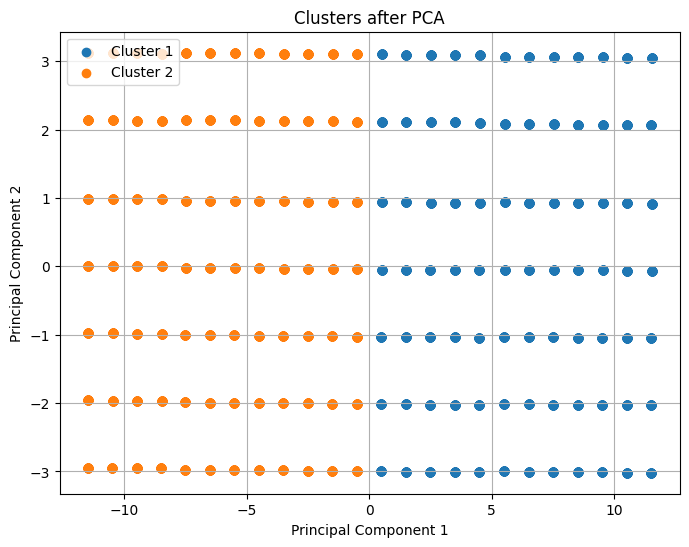

In [11]:
# Determine the best value of K
best_k = 2
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans.fit(X)
df['cluster'] = kmeans.labels_


# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot clusters after PCA
plt.figure(figsize=(8, 6))
for i in range(best_k):
    plt.scatter(X_pca[df['cluster'] == i, 0], X_pca[df['cluster'] == i, 1], label=f'Cluster {i+1}')

plt.title('Clusters after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
df

,timestamp,value,dtcat,dayofweek,hour,cluster
0,2013-07-04 00:00:00,69.880835,Weekday Night,3,0,0
1,2013-07-04 01:00:00,71.220227,Weekday Night,3,1,0
2,2013-07-04 02:00:00,70.877805,Weekday Night,3,2,0
3,2013-07-04 03:00:00,68.959400,Weekday Night,3,3,0
4,2013-07-04 04:00:00,69.283551,Weekday Night,3,4,0
...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,72.370206,Weekday Day,2,11,0
7263,2014-05-28 12:00:00,72.172956,Weekday Day,2,12,1
7264,2014-05-28 13:00:00,72.046565,Weekday Day,2,13,1
7265,2014-05-28 14:00:00,71.825226,Weekday Day,2,14,1


# 5 - Apply the Gaussian distribution (EllipticEnvelope) algorithm, as defined at step 2.
(Use this command: from sklearn.covariance import EllipticEnvelope)
List anomalies (if any) in each category and show them graphically.

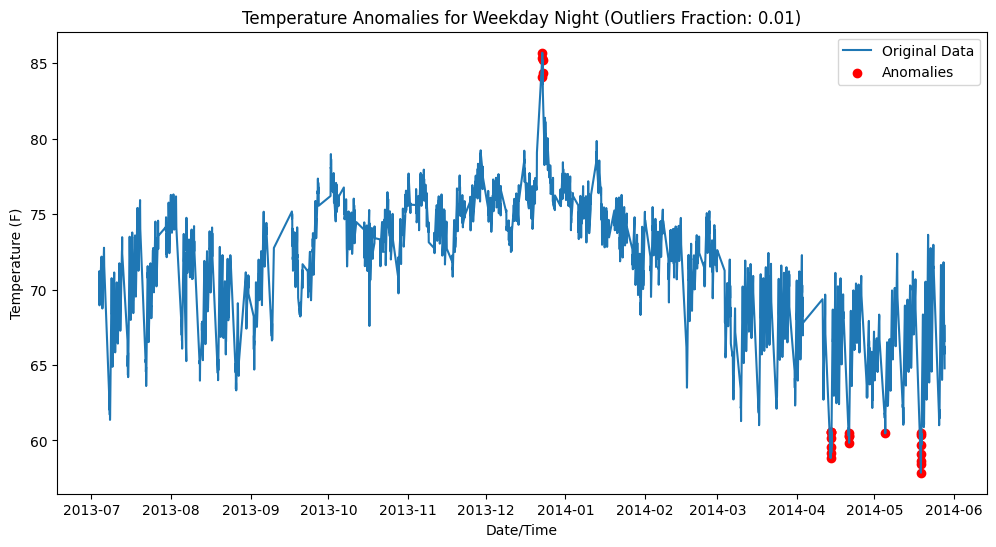

Number of anomalies detected for Weekday Night (Outliers Fraction: 0.01): 24


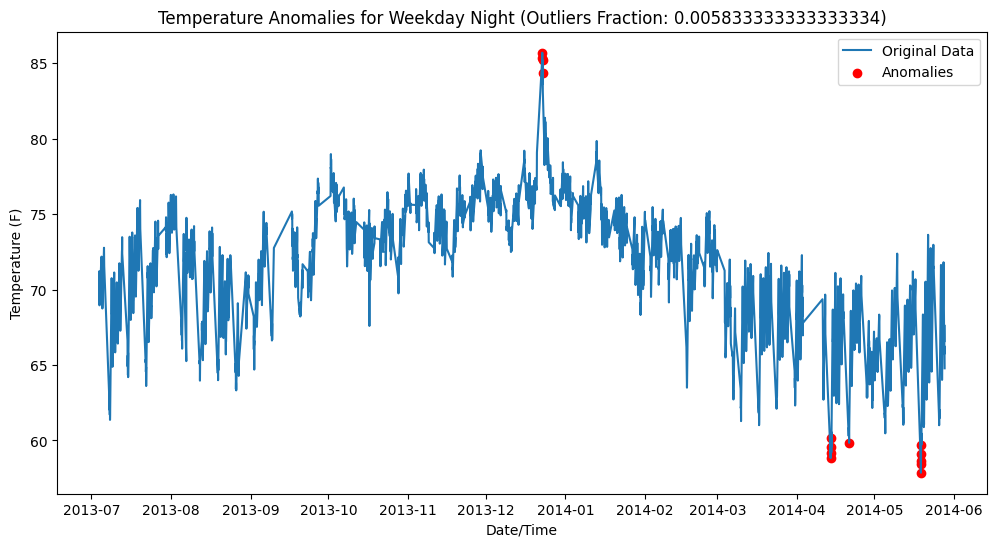

Number of anomalies detected for Weekday Night (Outliers Fraction: 0.005833333333333334): 14


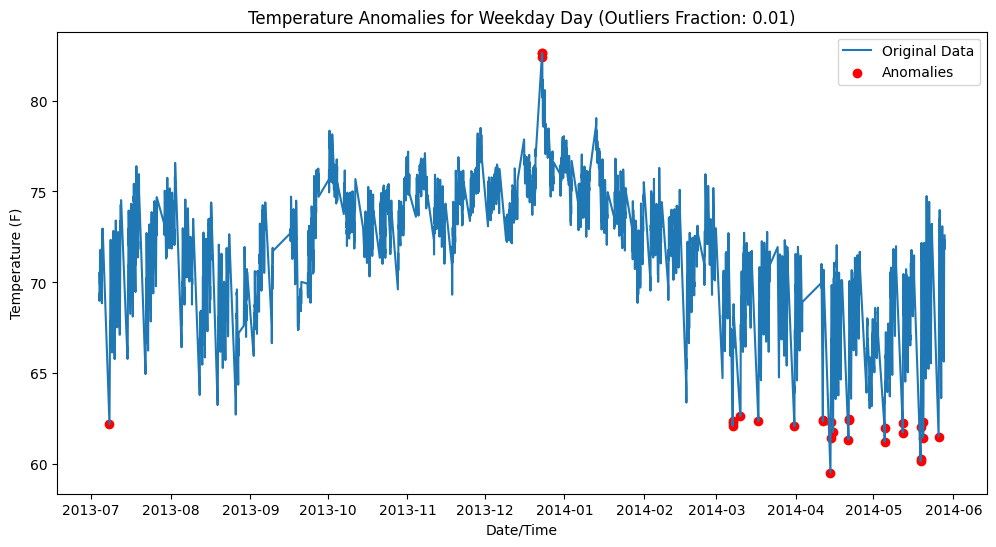

Number of anomalies detected for Weekday Day (Outliers Fraction: 0.01): 29


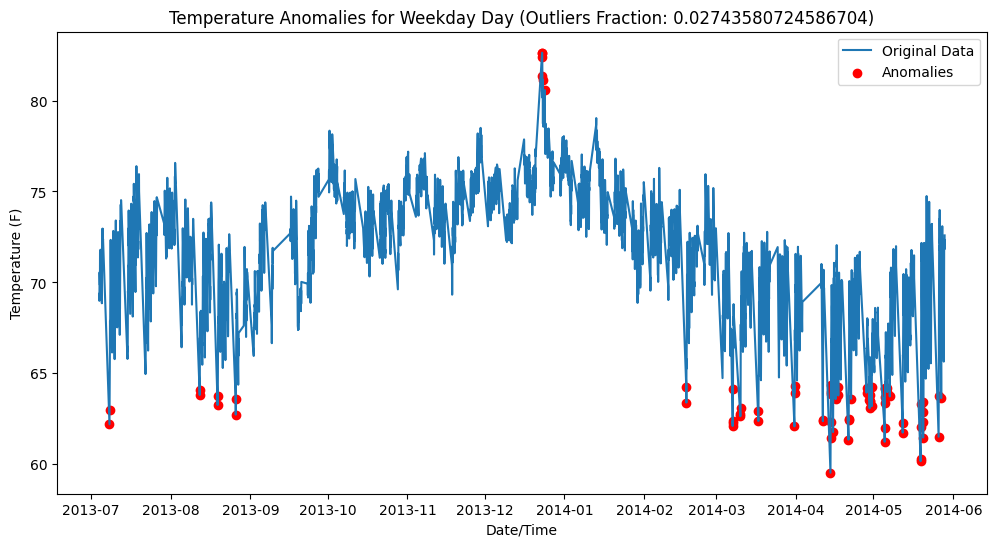

Number of anomalies detected for Weekday Day (Outliers Fraction: 0.02743580724586704): 78


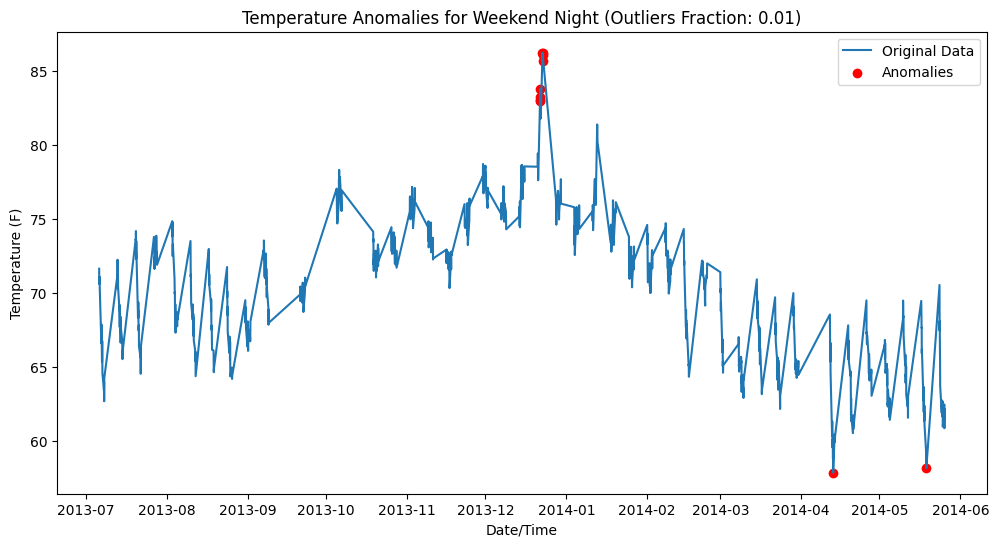

Number of anomalies detected for Weekend Night (Outliers Fraction: 0.01): 10


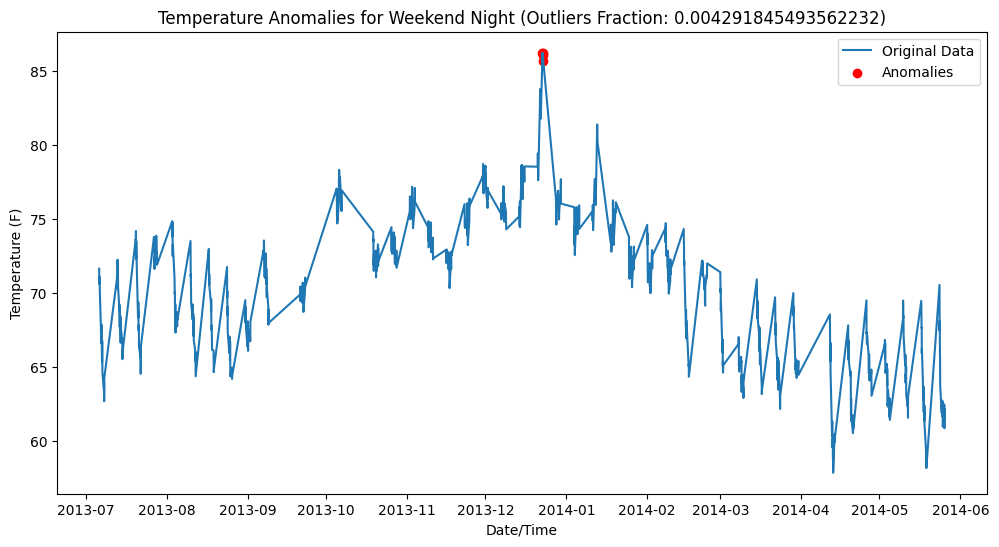

Number of anomalies detected for Weekend Night (Outliers Fraction: 0.004291845493562232): 4


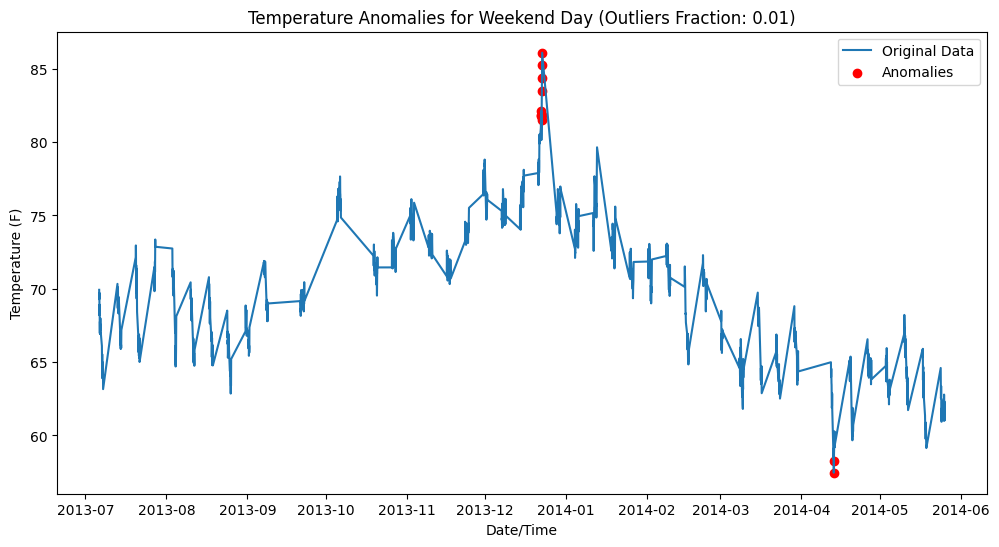

Number of anomalies detected for Weekend Day (Outliers Fraction: 0.01): 11


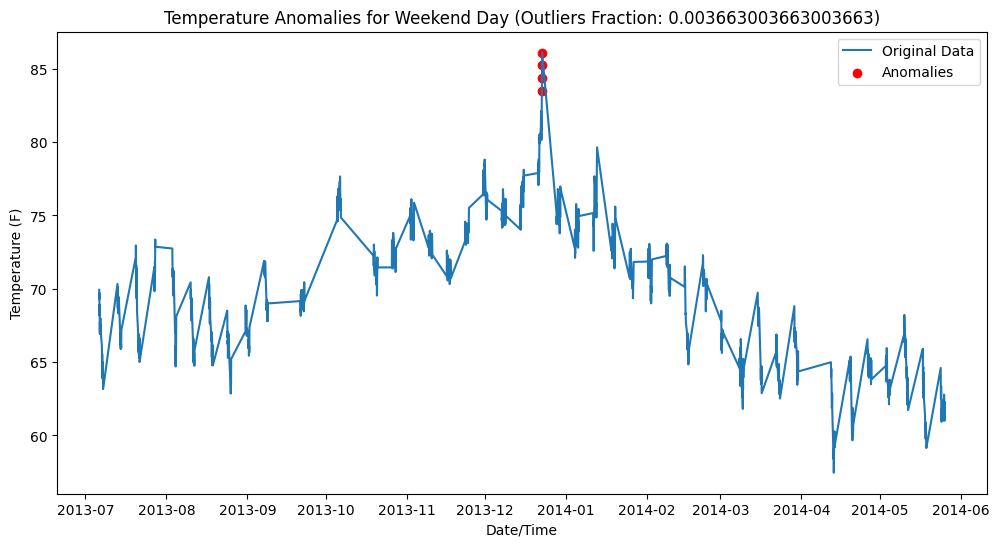

Number of anomalies detected for Weekend Day (Outliers Fraction: 0.003663003663003663): 4


In [13]:
# Function to detect anomalies and plot
def detect_anomalies_and_plot(category, outliers_fraction):
    plt.figure(figsize=(12, 6))
    plt.plot(df[df['dtcat'] == category]['timestamp'], df[df['dtcat'] == category]['value'], label='Original Data')

    # Fit EllipticEnvelope to detect anomalies
    elliptic_envelope = EllipticEnvelope(contamination=outliers_fraction)
    elliptic_envelope.fit(df[df['dtcat'] == category][['value']])

    # Predict outliers/anomalies
    anomalies = elliptic_envelope.predict(df[df['dtcat'] == category][['value']])

    # Get the indices of anomalies
    anomalies_indices = df[df['dtcat'] == category].index[anomalies == -1]

    # Highlight anomalies
    plt.scatter(df[df['dtcat'] == category].loc[anomalies_indices, 'timestamp'],
                df[df['dtcat'] == category].loc[anomalies_indices, 'value'],
                color='red', label='Anomalies')

    plt.xlabel('Date/Time')
    plt.ylabel('Temperature (F)')
    plt.title(f'Temperature Anomalies for {category} (Outliers Fraction: {outliers_fraction})')
    plt.legend()
    plt.show()

    # Count anomalies
    num_anomalies = len(anomalies_indices)
    print(f'Number of anomalies detected for {category} (Outliers Fraction: {outliers_fraction}): {num_anomalies}')

# Iterate through each category and detect anomalies twice with different values of outliers_fraction
for category in df['dtcat'].unique():
    for execution in range(2):
        # Define outliers_fraction
        if execution == 0:
            outliers_fraction = 0.01  # First execution
        else:
            q1 = df[df['dtcat'] == category]['value'].quantile(0.25)
            q3 = df[df['dtcat'] == category]['value'].quantile(0.75)
            iqr = q3 - q1
            outliers_fraction = (np.sum((df[df['dtcat'] == category]['value'] < (q1 - 1.5 * iqr)) |
                                         (df[df['dtcat'] == category]['value'] > (q3 + 1.5 * iqr))) /
                                 len(df[df['dtcat'] == category]['value'])) * 2

        detect_anomalies_and_plot(category, outliers_fraction)


## 6) Apply the Isolation Forest algorithm at each category, as defined step 2.
(Use this command: from sklearn.ensemble import IsolationForest)
List anomalies (if any) in each category and show them graphically.

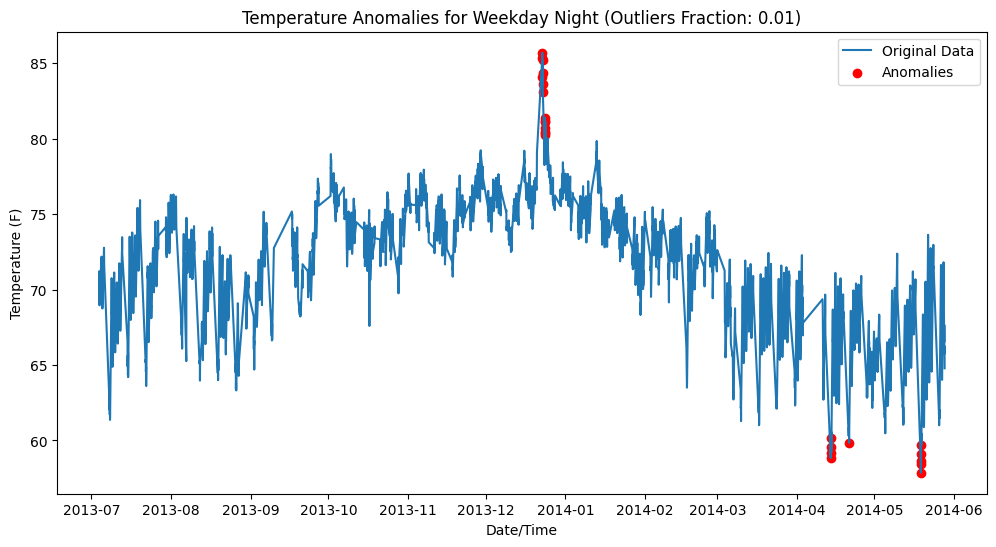

Number of anomalies detected for Weekday Night (Outliers Fraction: 0.01): 24


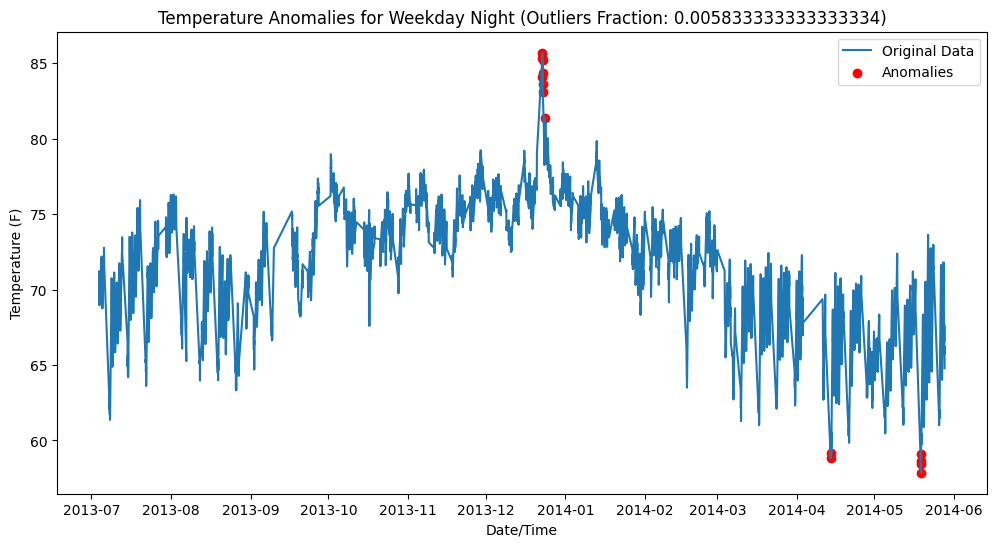

Number of anomalies detected for Weekday Night (Outliers Fraction: 0.005833333333333334): 14


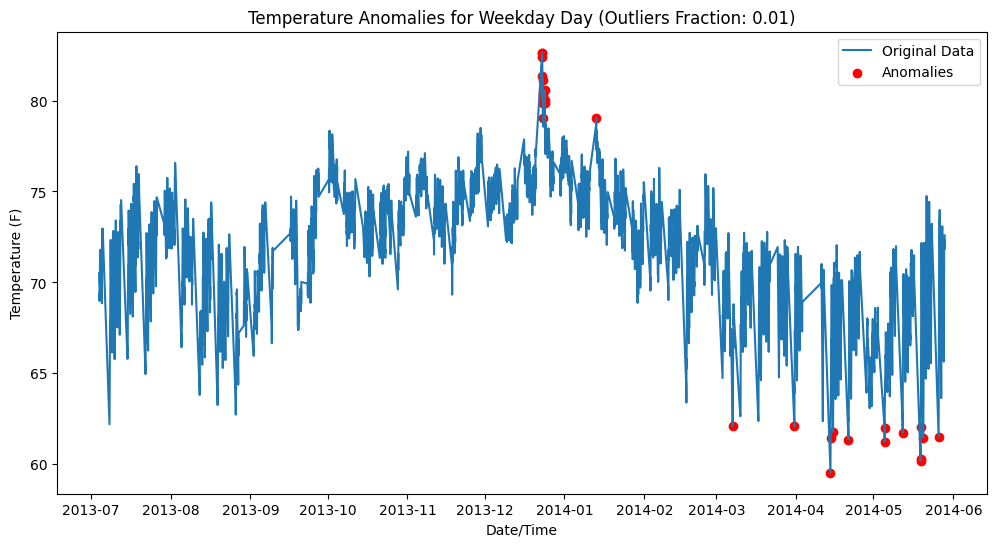

Number of anomalies detected for Weekday Day (Outliers Fraction: 0.01): 29


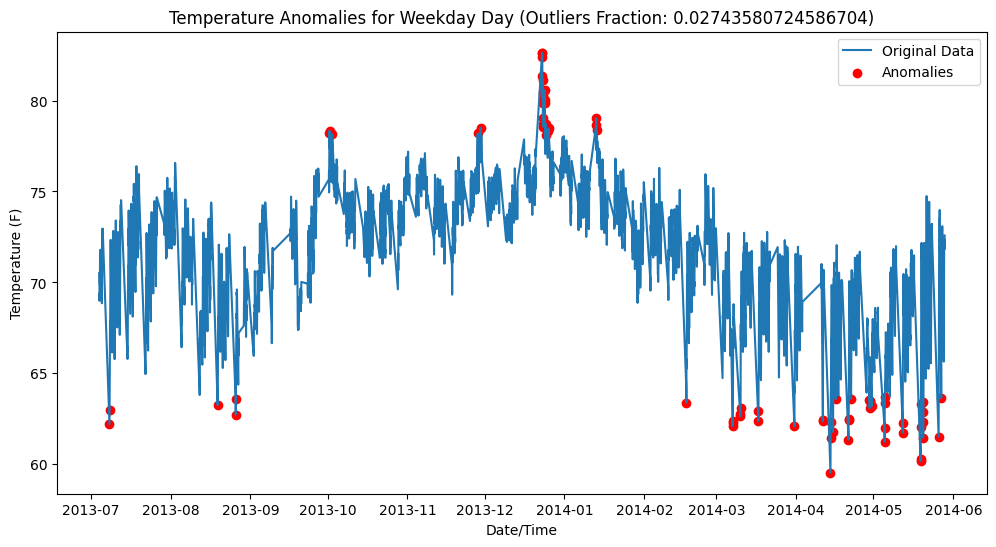

Number of anomalies detected for Weekday Day (Outliers Fraction: 0.02743580724586704): 77


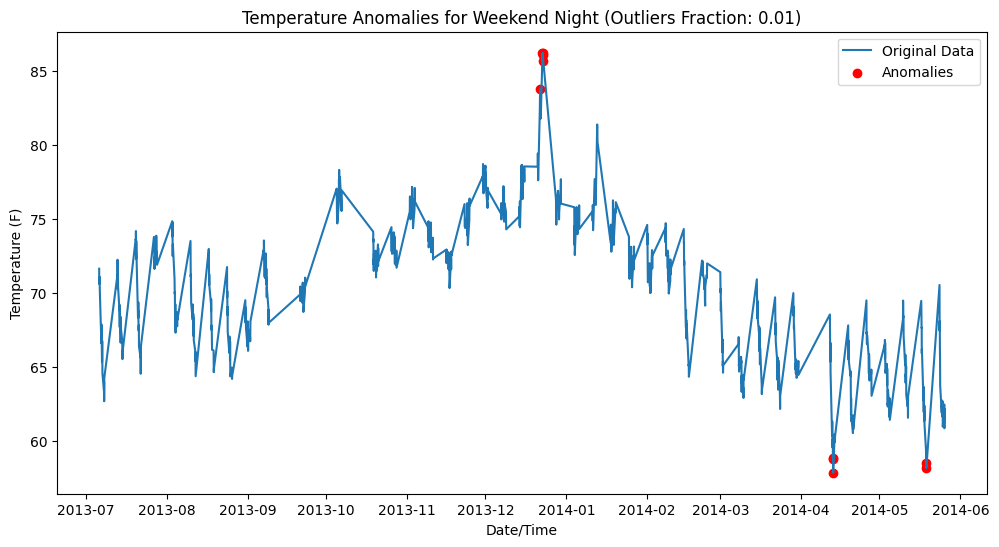

Number of anomalies detected for Weekend Night (Outliers Fraction: 0.01): 10


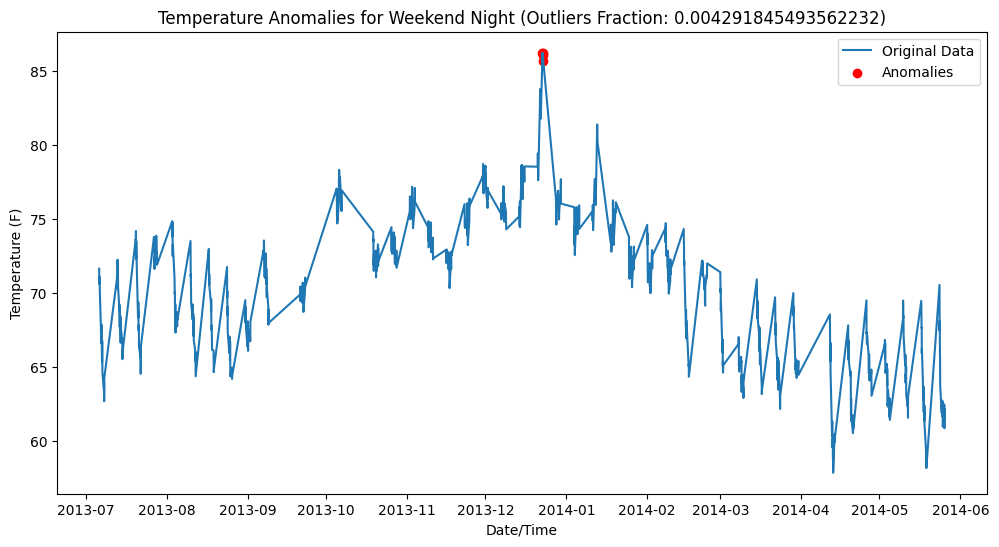

Number of anomalies detected for Weekend Night (Outliers Fraction: 0.004291845493562232): 4


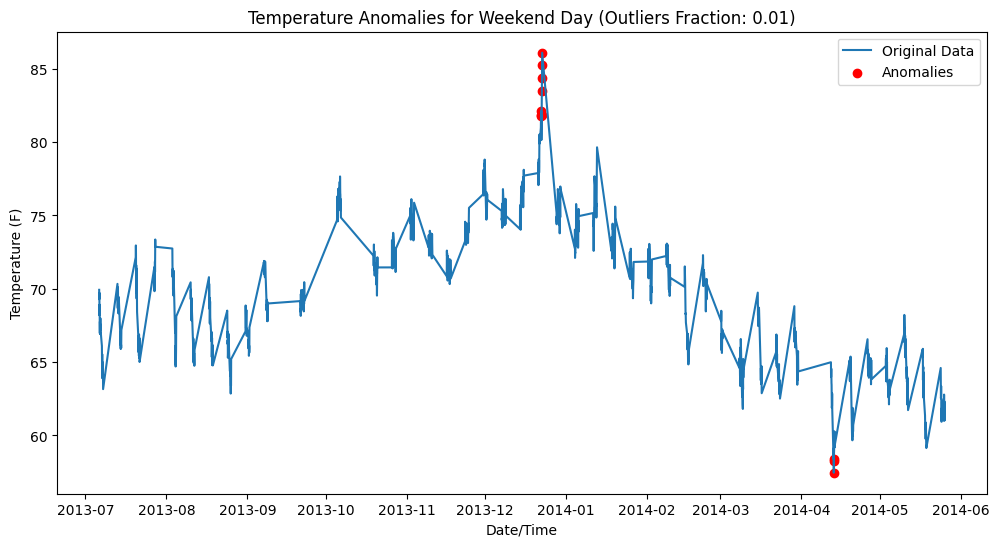

Number of anomalies detected for Weekend Day (Outliers Fraction: 0.01): 11


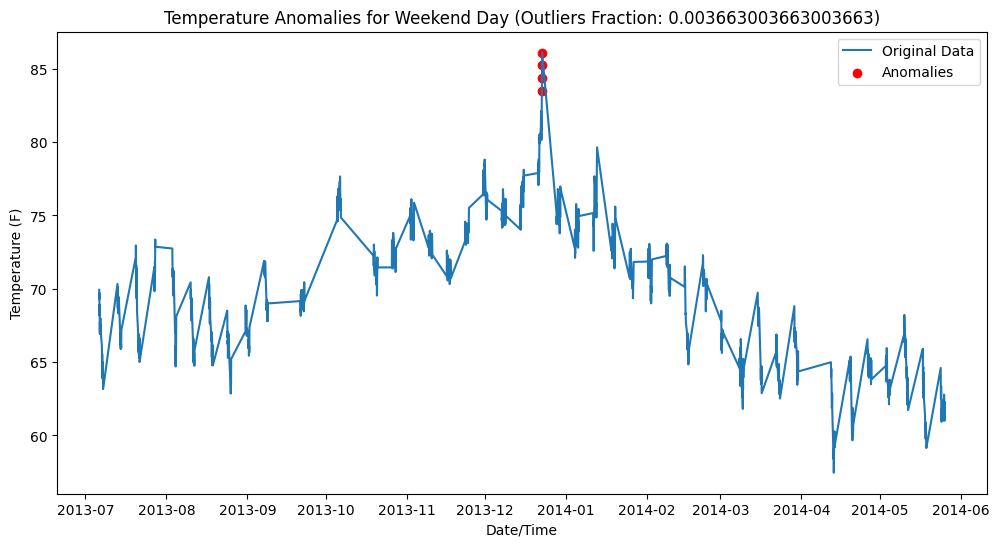

Number of anomalies detected for Weekend Day (Outliers Fraction: 0.003663003663003663): 4


In [16]:


# Function to detect anomalies and plot
def detect_anomalies_and_plot(category, outliers_fraction):
    plt.figure(figsize=(12, 6))
    plt.plot(df[df['dtcat'] == category]['timestamp'], df[df['dtcat'] == category]['value'], label='Original Data')

    # Fit Isolation Forest to detect anomalies
    isolation_forest = IsolationForest(contamination=outliers_fraction, random_state=42)
    isolation_forest.fit(df[df['dtcat'] == category][['value']])

    # Predict outliers/anomalies
    anomalies = isolation_forest.predict(df[df['dtcat'] == category][['value']])

    # Get the indices of anomalies
    anomalies_indices = df[df['dtcat'] == category].index[anomalies == -1]

    # Highlight anomalies
    plt.scatter(df[df['dtcat'] == category].loc[anomalies_indices, 'timestamp'],
                df[df['dtcat'] == category].loc[anomalies_indices, 'value'],
                color='red', label='Anomalies')

    plt.xlabel('Date/Time')
    plt.ylabel('Temperature (F)')
    plt.title(f'Temperature Anomalies for {category} (Outliers Fraction: {outliers_fraction})')
    plt.legend()
    plt.show()

    # Count anomalies
    num_anomalies = len(anomalies_indices)
    print(f'Number of anomalies detected for {category} (Outliers Fraction: {outliers_fraction}): {num_anomalies}')

# Iterate through each category and detect anomalies twice with different values of outliers_fraction
for category in df['dtcat'].unique():
    for execution in range(2):
        # Define outliers_fraction
        if execution == 0:
            outliers_fraction = 0.01  # First execution
        else:
            q1 = df[df['dtcat'] == category]['value'].quantile(0.25)
            q3 = df[df['dtcat'] == category]['value'].quantile(0.75)
            iqr = q3 - q1
            outliers_fraction = (np.sum((df[df['dtcat'] == category]['value'] < (q1 - 1.5 * iqr)) |
                                         (df[df['dtcat'] == category]['value'] > (q3 + 1.5 * iqr))) /
                                 len(df[df['dtcat'] == category]['value'])) * 2

        detect_anomalies_and_plot(category, outliers_fraction)


### 7) Which of the two (2) models performs better on detecting anomalies?

In [15]:
elliptic_envelope_scores = {
    'weekday_night': [24, 14],
    'weekday_day': [29, 78],
    'weekend_night': [10, 4],
    'weekend_day': [11, 4]
}

isolation_forest_scores = {
    'weekday_night': [24, 14],
    'weekday_day': [29, 77],
    'weekend_night': [10, 4],
    'weekend_day': [11, 4]
}

# Calculate the total number of anomalies detected by each model
total_elliptic_envelope_anomalies = sum(sum(scores) for scores in elliptic_envelope_scores.values())
total_isolation_forest_anomalies = sum(sum(scores) for scores in isolation_forest_scores.values())

# Compare the total number of anomalies detected by each model
if total_elliptic_envelope_anomalies > total_isolation_forest_anomalies:
    print("Elliptic Envelope performs better in detecting anomalies.")
elif total_elliptic_envelope_anomalies < total_isolation_forest_anomalies:
    print("Isolation Forest performs better in detecting anomalies.")
else:
    print("Both models perform equally well in detecting anomalies.")

Elliptic Envelope performs better in detecting anomalies.


Based on these numbers, the Elliptic Envelope model detected one more anomaly in total compared to the Isolation Forest model. Therefore, in this scenario, the Elliptic Envelope model performed better in detecting anomalies.





